In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive
%cd MyDrive
%cd Colab Notebooks
%cd influenza
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import norm, skew 
from scipy import stats
from datetime import date
import matplotlib


Mounted at /content/gdrive/
/content/gdrive
/content/gdrive/MyDrive
/content/gdrive/MyDrive/Colab Notebooks
/content/gdrive/MyDrive/Colab Notebooks/influenza


In [2]:
df=pd.read_csv("ILINet.csv")
df_masks=pd.read_csv("Mask.csv")[['state','date','value','sample_size']]

df['formatted_date'] = df.YEAR * 1000 + df.WEEK * 10 + 0
df['date'] = pd.to_datetime(df['formatted_date'], format='%Y%W%w')
df1=df[['REGION','date','%UNWEIGHTED ILI']]
df2=df1[df1['%UNWEIGHTED ILI']!='X']
df2['%UNWEIGHTED ILI']=df2['%UNWEIGHTED ILI'].astype(float)
df2.set_index('date',drop=True,inplace=True)

<ipython-input-2-486ec4a9faf8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['%UNWEIGHTED ILI']=df2['%UNWEIGHTED ILI'].astype(float)


In [3]:
df_masks['date'] = pd.to_datetime(df_masks['date'])
df_masks['value']=df_masks['value'].astype(float)
df_masks.set_index('date',drop=True,inplace=True)

In [4]:
df_masks1=df_masks[(df_masks['value']<100) & (df_masks['value']>0)]
states_m=df_masks1['state'].unique()
print(len(states_m))


51


In [5]:
df3=df2[(df2['%UNWEIGHTED ILI']<100) & (df2['%UNWEIGHTED ILI']>0)]
states=df3['REGION'].unique()
print(len(states))
df4=df3['2020':]

54


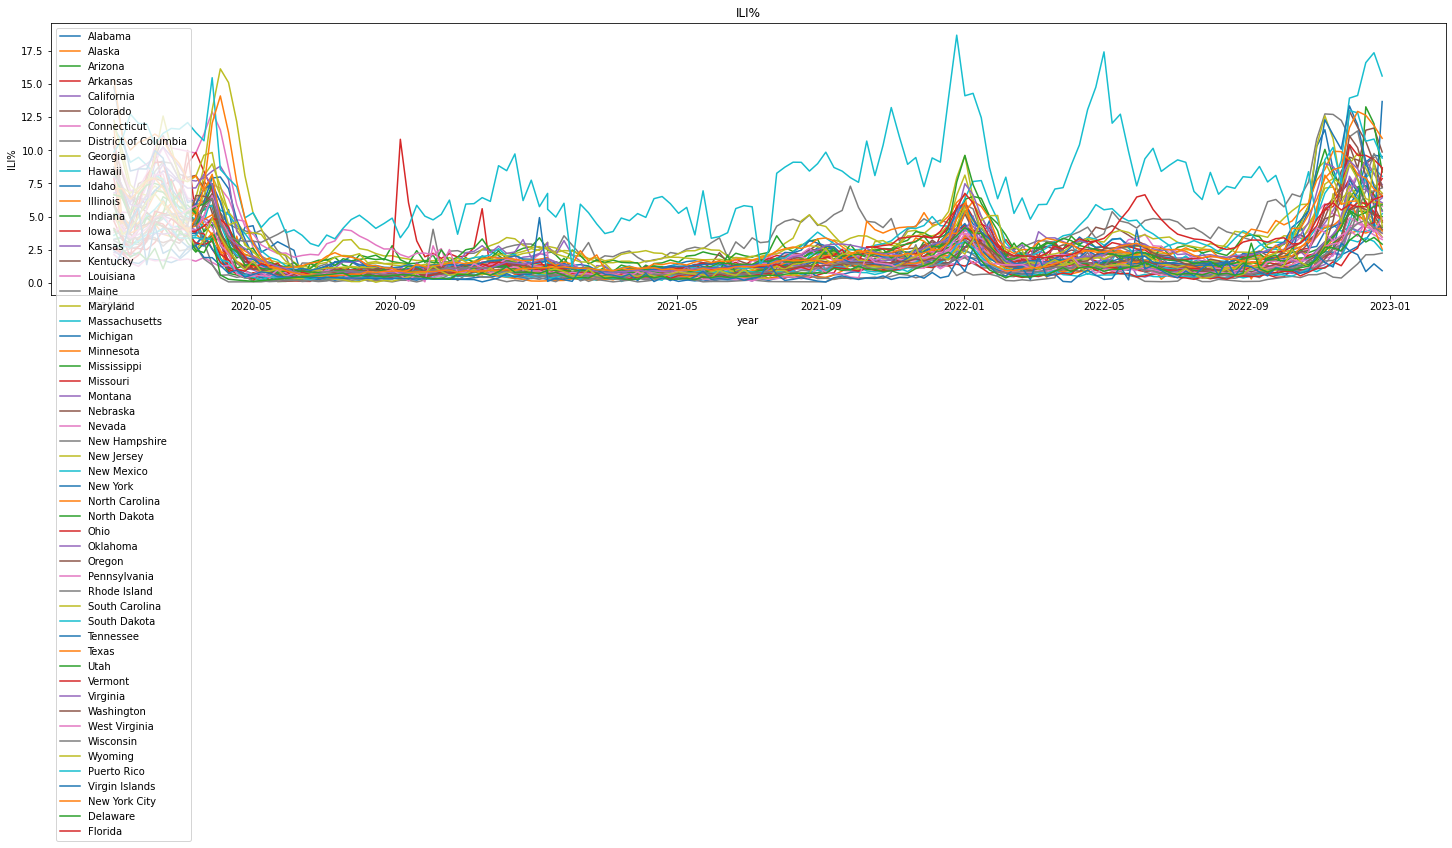

In [10]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states:
  plt.plot(df4[df4['REGION']==i]['%UNWEIGHTED ILI'],label=i)
  plt.xlabel('year')
  plt.ylabel('ILI%')
  plt.title('ILI%')
  plt.legend(loc='best')

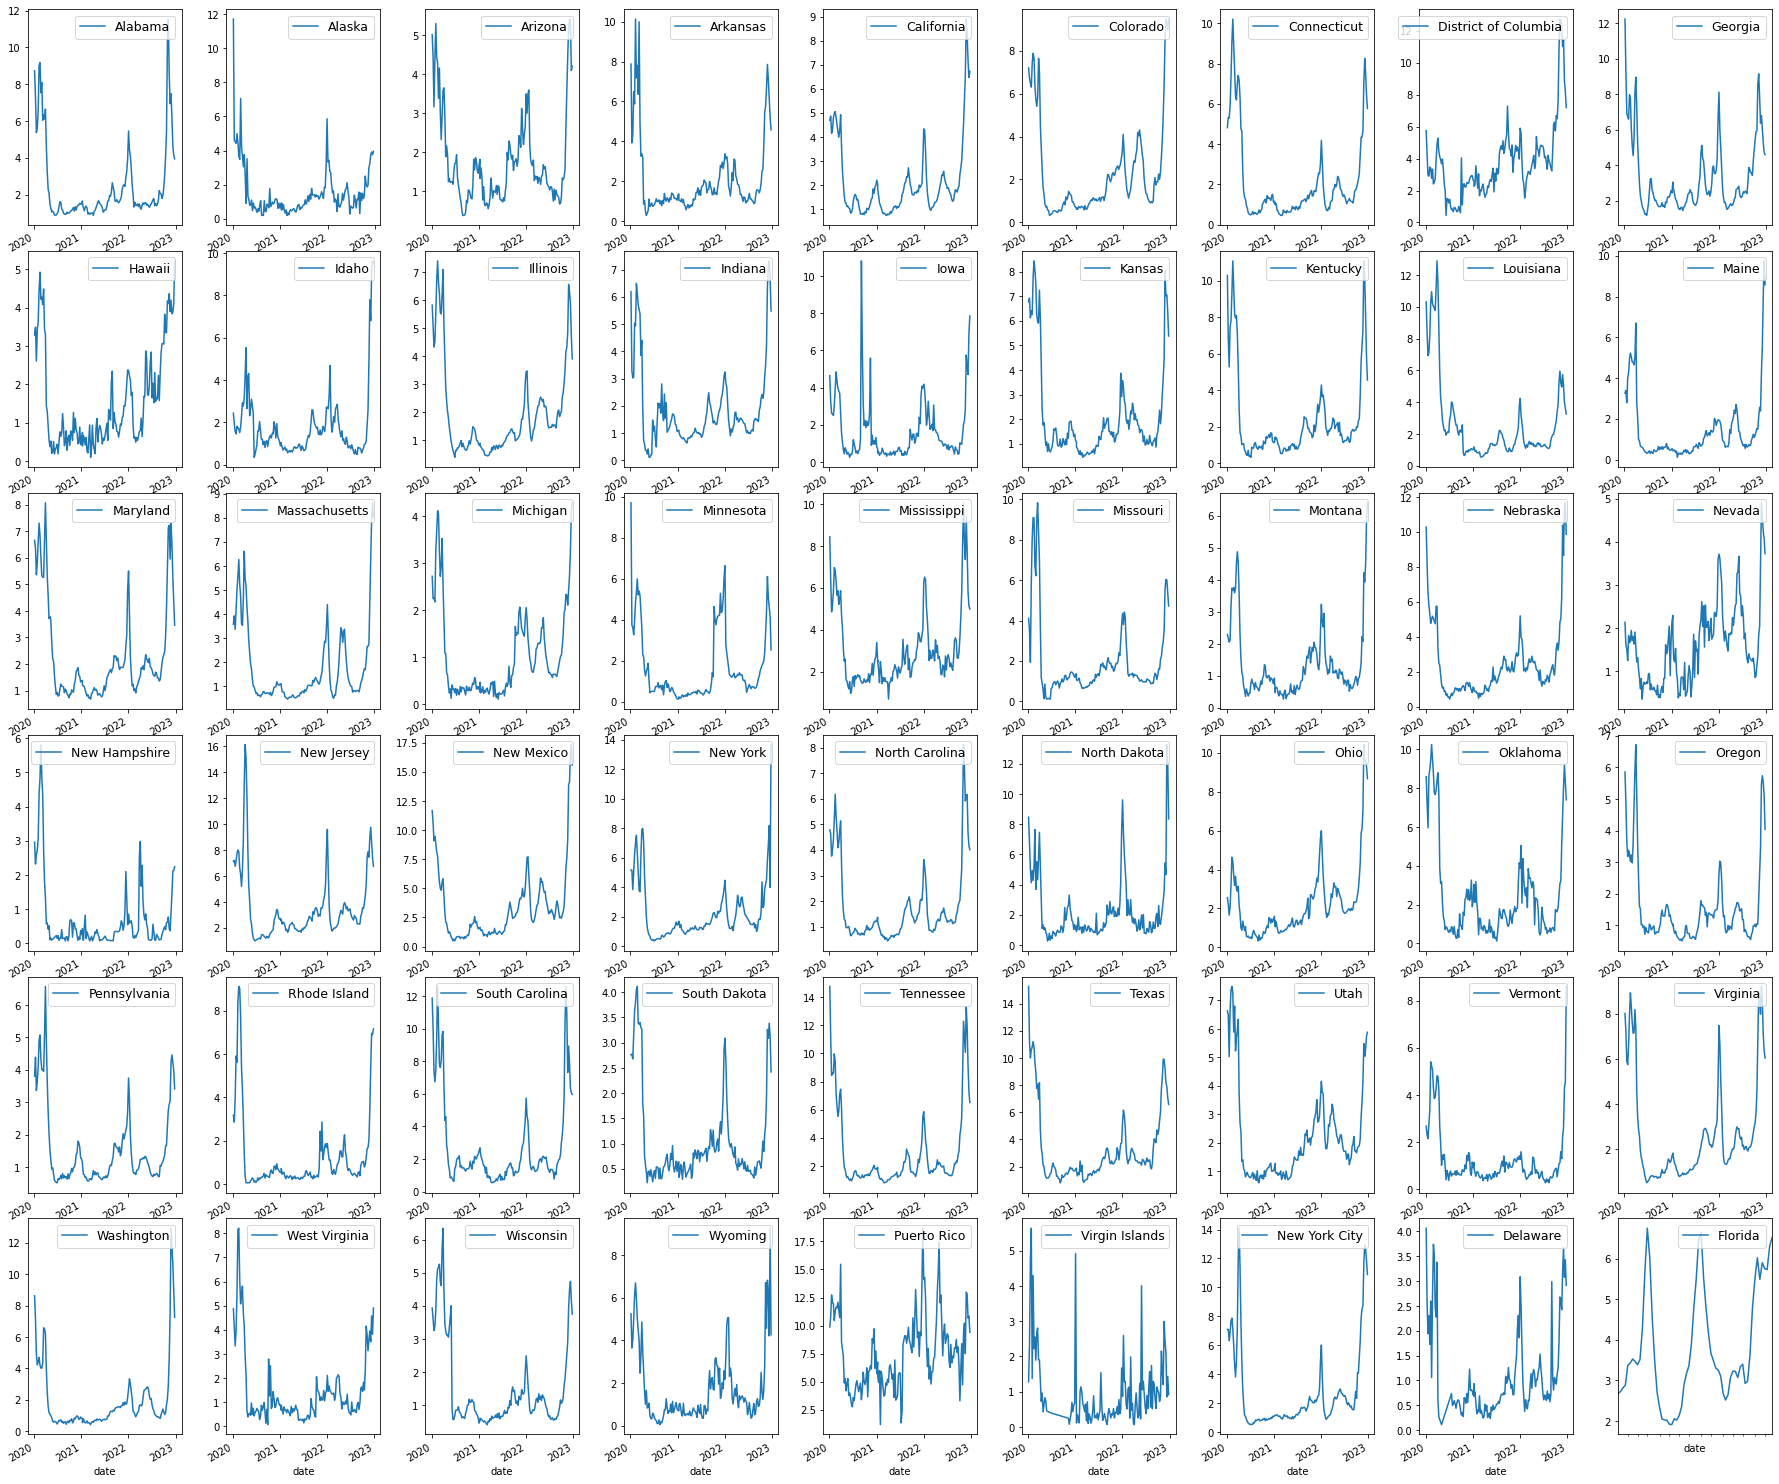

In [18]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
fig.tight_layout()
for r in range(nrow):
  for c in range(ncol):
    df4[df4['REGION']==states[i]]['%UNWEIGHTED ILI'].plot(ax=axes[r,c],fontsize=10,label=states[i])
    axes[r,c].legend(loc="upper right",fontsize=12.5)
    axes[r,c].xaxis.set_major_locator(matplotlib.dates.YearLocator())
    axes[r,c].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
    if i ==len(states)-1:
      break
    i+=1


In [ ]:
df_masks1.head()

state      value  sample_size
date                                    
2021-02-09    AK  91.121495     106.0000
2021-02-09    AL  90.707183     381.0155
2021-02-09    AR  88.645782     293.9873
2021-02-09    AZ  93.294110     632.7712
2021-02-09    CA  96.411049    2437.0384

In [22]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))


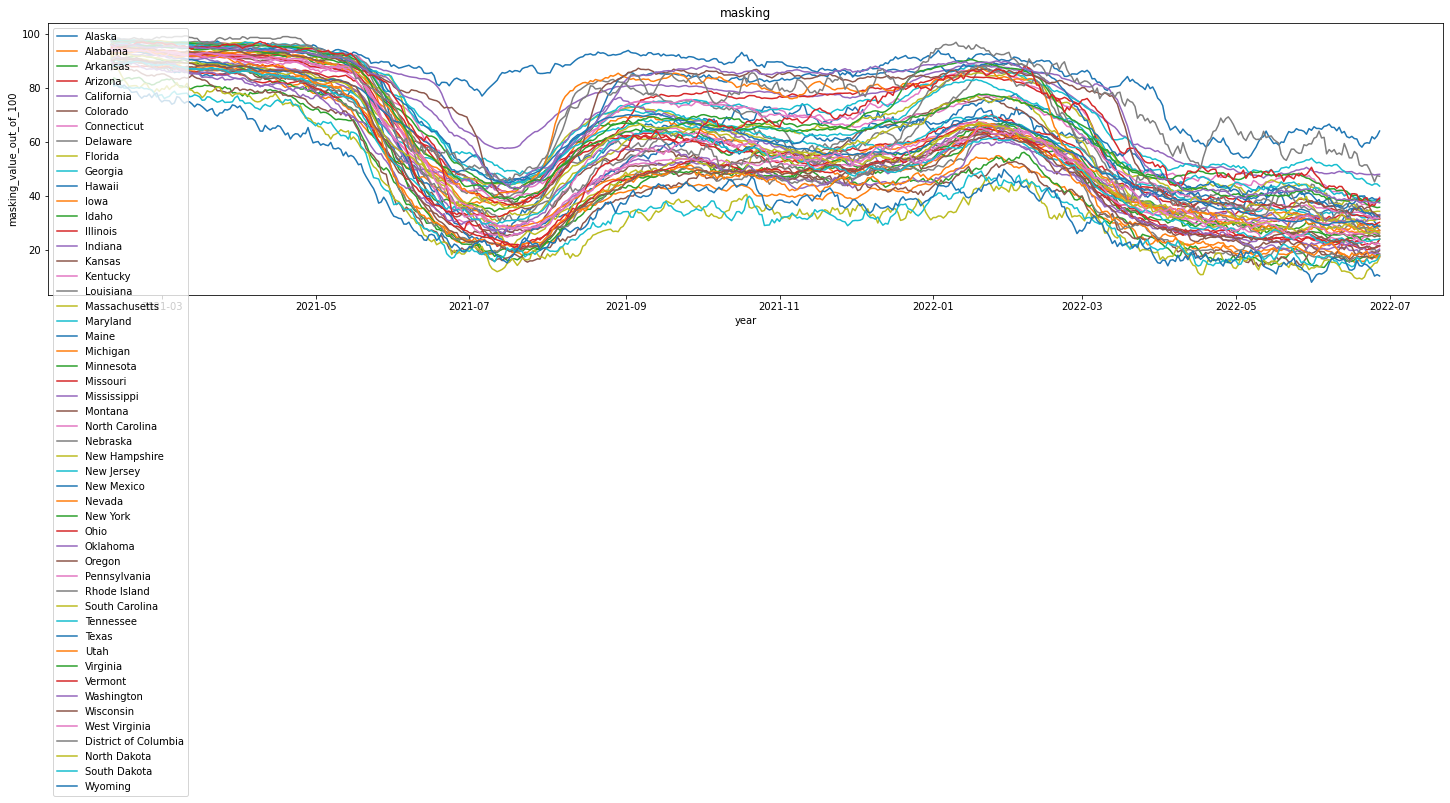

In [23]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states_m:
  plt.plot(df_masks1[df_masks1['state']==i]['value'],label=abbrev_to_us_state[i])
  plt.xlabel('year')
  plt.ylabel('masking_value_out_of_100')
  plt.title('masking')
  plt.legend(loc='best')

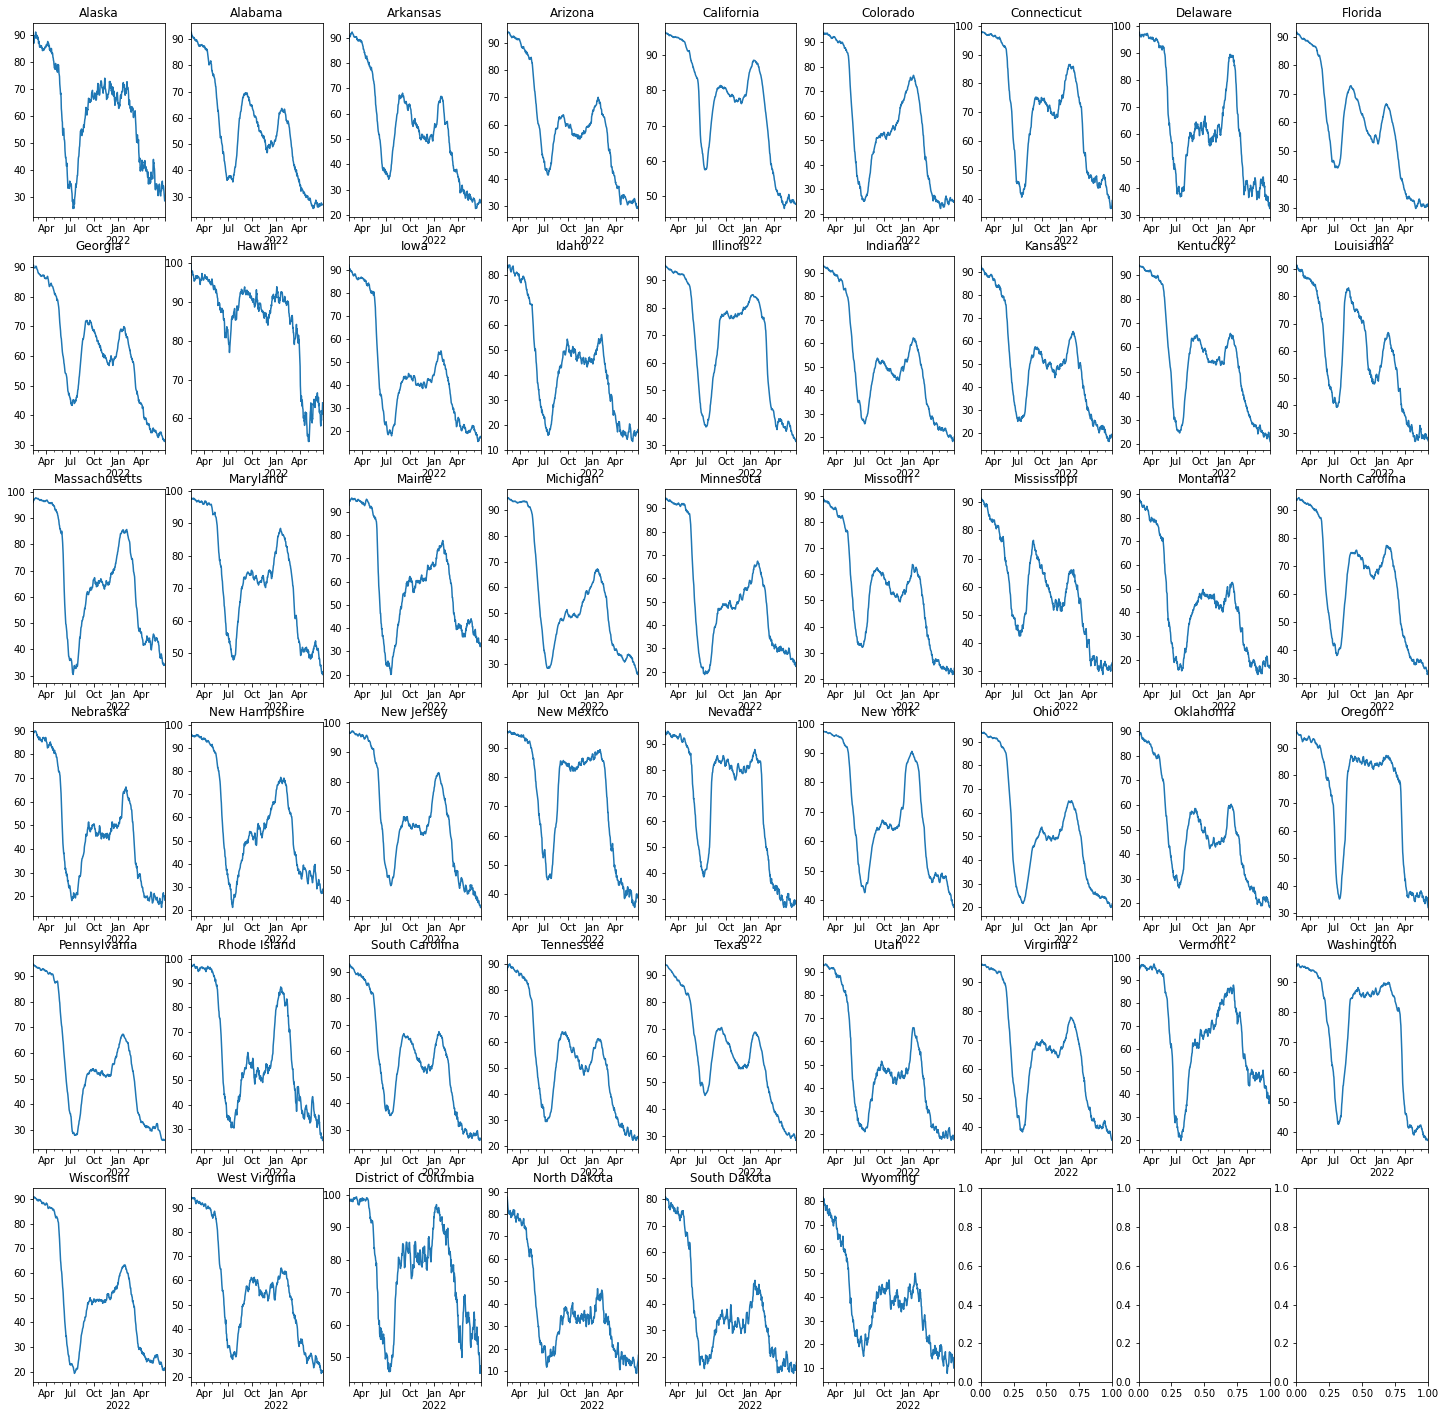

In [35]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
#fig.tight_layout()
for r in range(nrow):
  for c in range(ncol):
    df_masks1[df_masks1['state']==states_m[i]]['value'].plot(ax=axes[r,c],title=abbrev_to_us_state[states_m[i]],xlabel='')
    #axes[r,c].legend(loc="upper right",fontsize=12.5)
    #axes[r,c].xaxis.set_major_locator(matplotlib.dates.YearLocator())
    #axes[r,c].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
    if i ==len(states_m)-1:
      break
    i+=1

In [20]:
df_policy=pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/United%20States/OxCGRT_USA_latest.csv')[['RegionName',
                                                                                                                                          'Date',
                                                                                                                                          'C1M_School closing',
                                                                                                                                          'H8M_Protection of elderly people']]
df_policy['Date']=pd.to_datetime(df_policy['Date'], format='%Y%m%d')
df_policy.set_index('Date',drop=True,inplace=True)


In [21]:
df_policy1=df_policy[~df_policy['RegionName'].isna()]['2020-03':]
states_p=df_policy1['RegionName'].unique()
#df_policy1[['C1M_School closing','H8M_Protection of elderly people']]=df_policy1[['C1M_School closing','H8M_Protection of elderly people']].astype('object')
print(df_policy1.info())
df_policy1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52836 entries, 2020-03-01 to 2022-12-31
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RegionName                        52836 non-null  object 
 1   C1M_School closing                51860 non-null  float64
 2   H8M_Protection of elderly people  51833 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.6+ MB
None


RegionName  C1M_School closing  H8M_Protection of elderly people
Date                                                                       
2020-03-01     Alaska                 0.0                               0.0
2020-03-02     Alaska                 0.0                               0.0
2020-03-03     Alaska                 0.0                               0.0
2020-03-04     Alaska                 0.0                               0.0
2020-03-05     Alaska                 0.0                               0.0

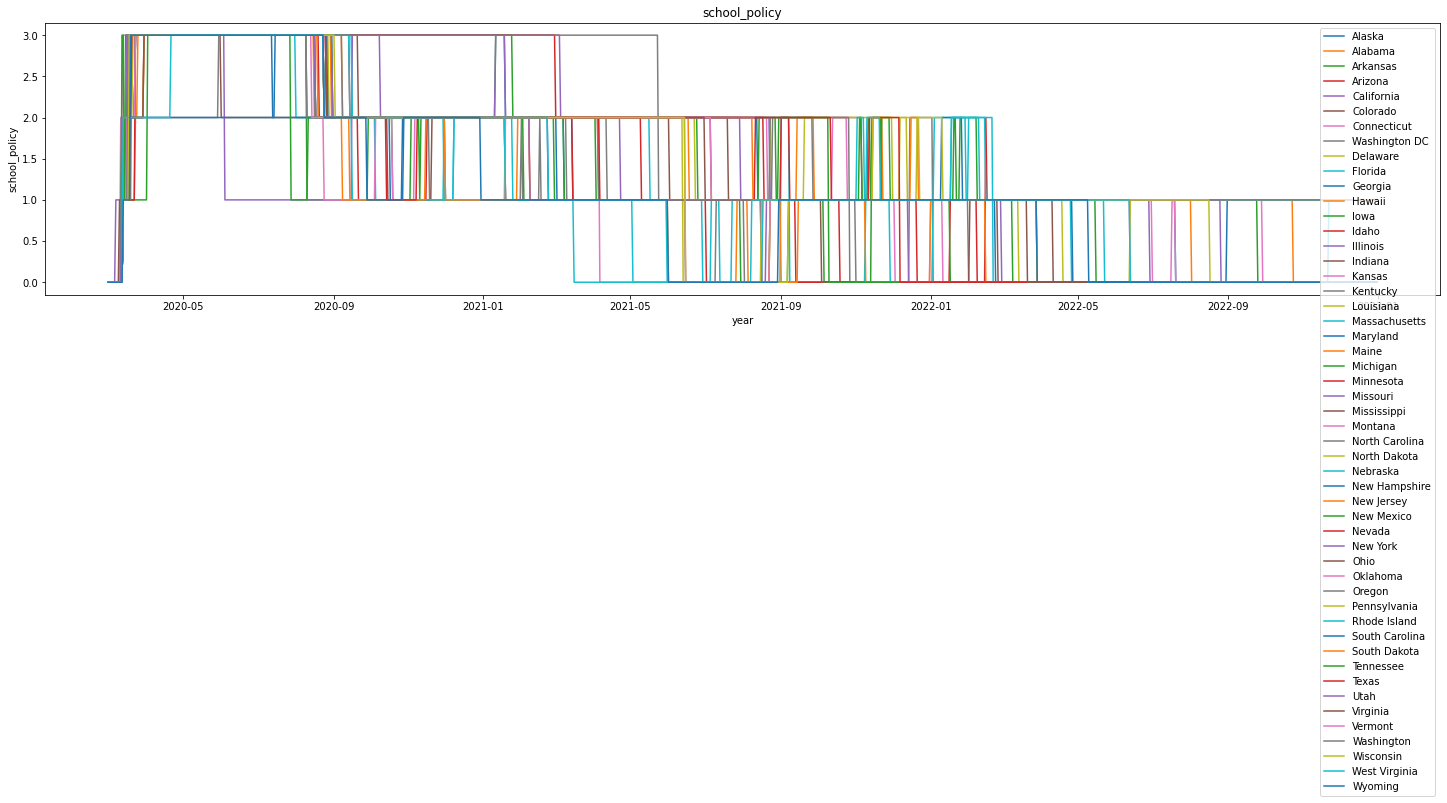

In [25]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states_p:
  plt.plot(df_policy1[df_policy1['RegionName']==i]['C1M_School closing'],label=i)
  plt.xlabel('year')
  plt.ylabel('school_policy')
  plt.title('school_policy')
  plt.legend(loc='best')

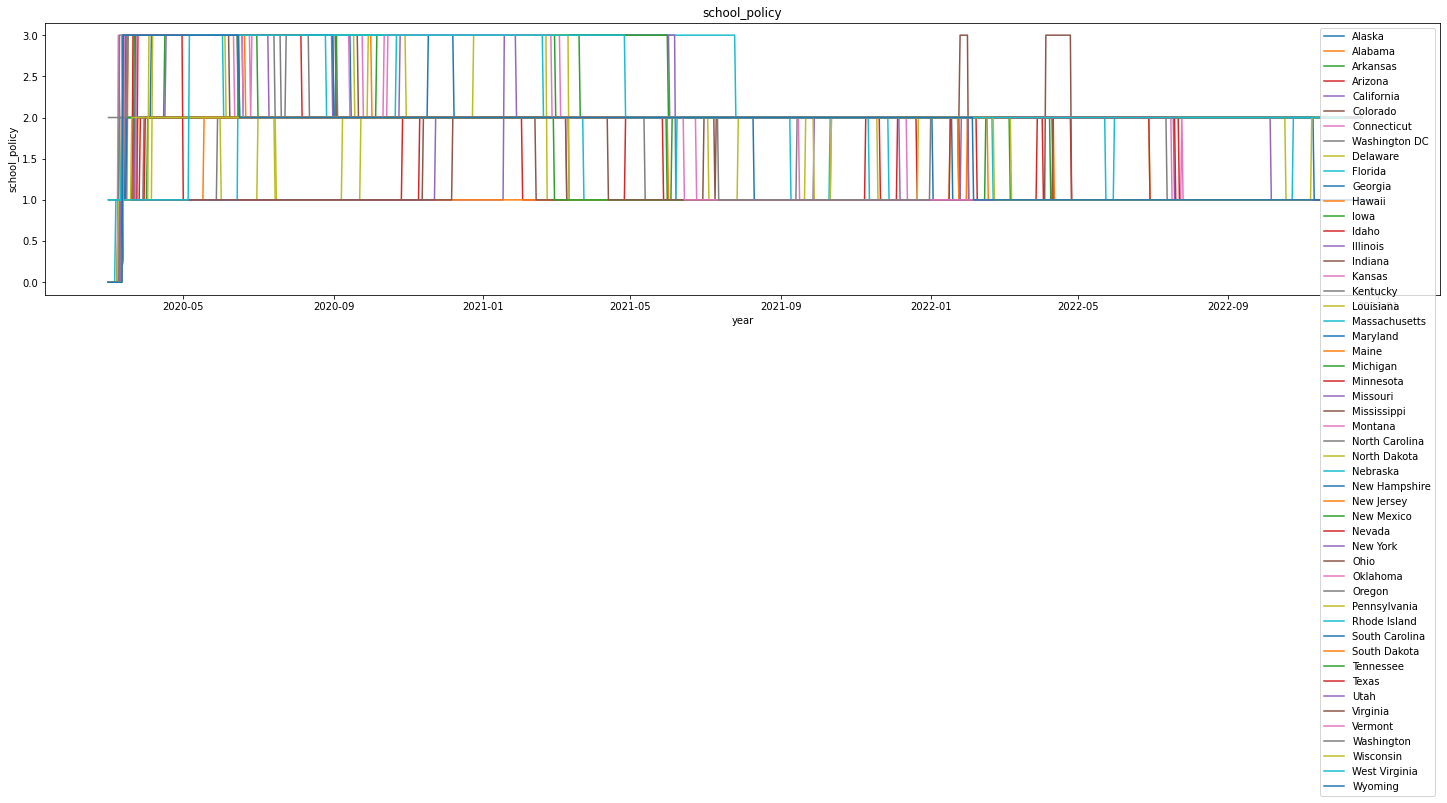

In [26]:
fig, (ax) = plt.subplots(1,figsize=(25,5))
for i in states_p:
  plt.plot(df_policy1[df_policy1['RegionName']==i]['H8M_Protection of elderly people'],label=i)
  plt.xlabel('year')
  plt.ylabel('school_policy')
  plt.title('school_policy')
  plt.legend(loc='best')

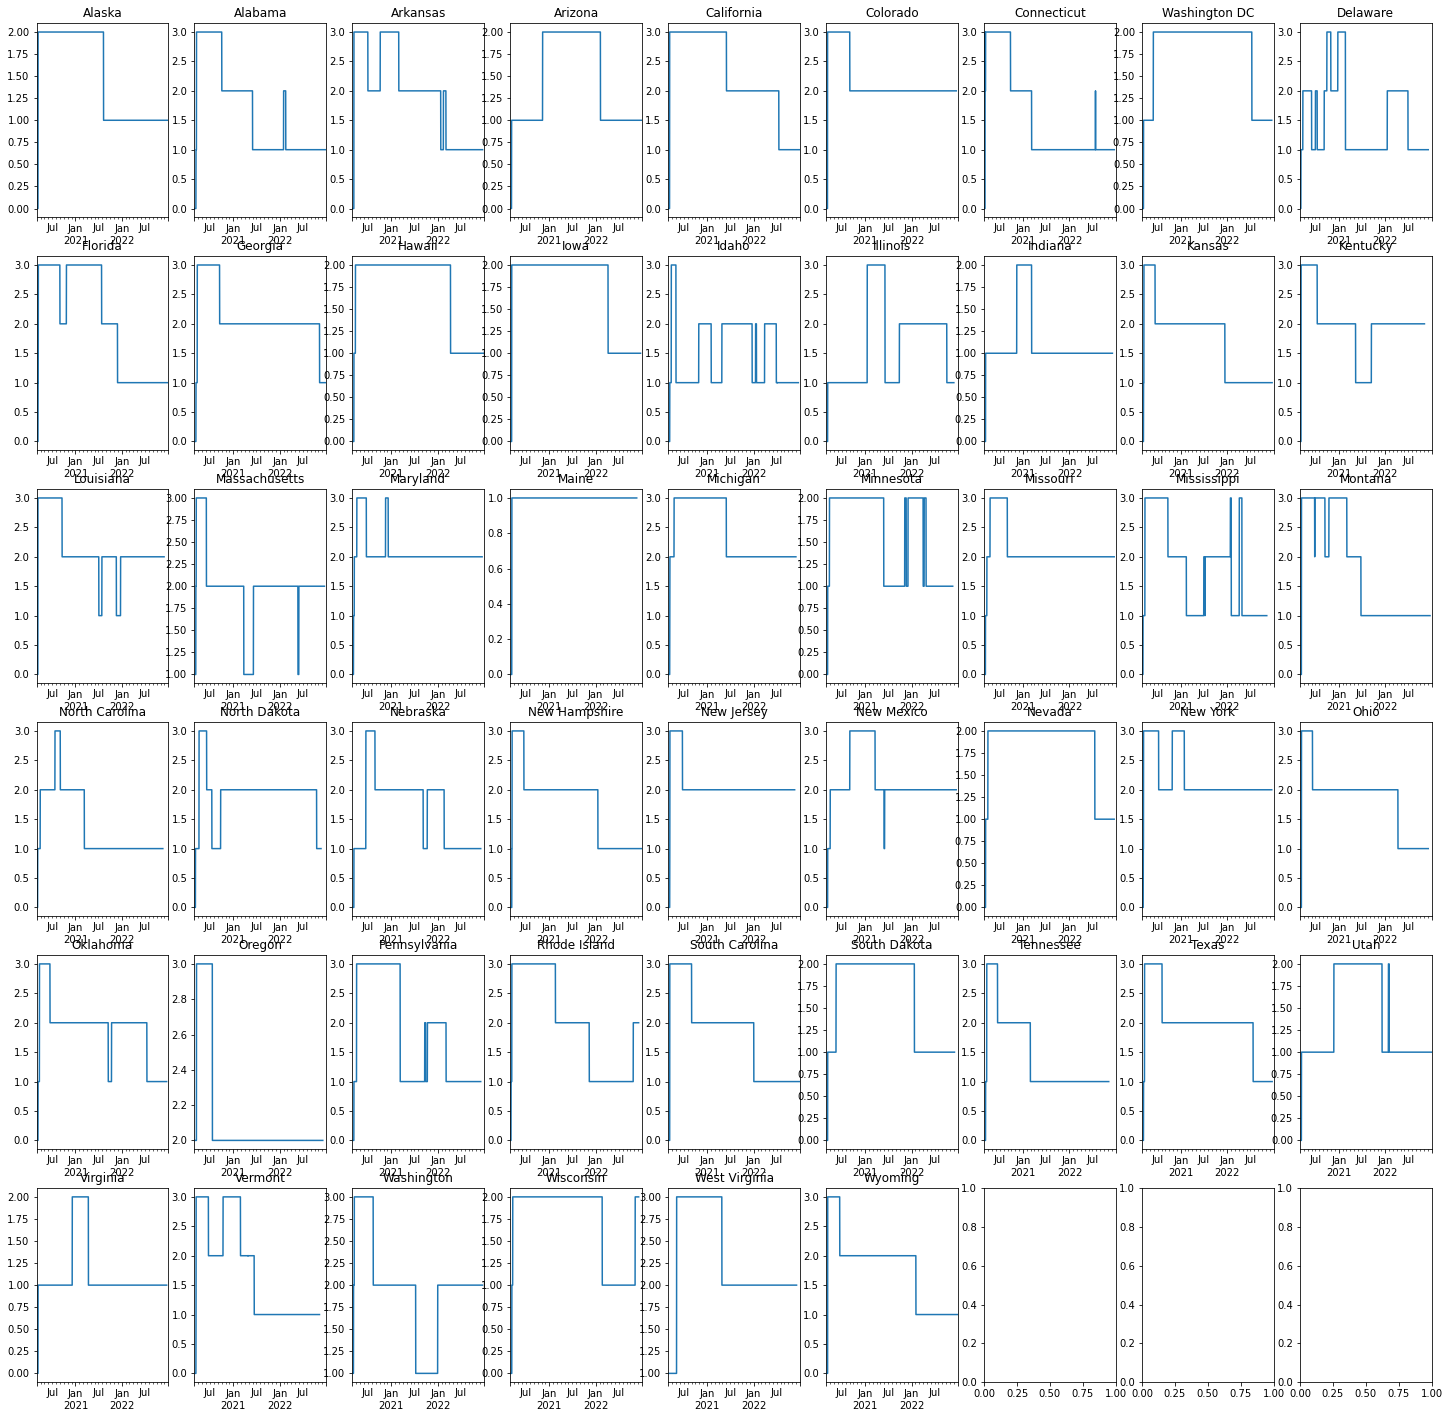

In [32]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
for r in range(nrow):
  for c in range(ncol):
    df_policy1[df_policy1['RegionName']==states_p[i]]['H8M_Protection of elderly people'].plot(ax=axes[r,c],title=states_p[i],xlabel='')
    #axes[r,c].legend(loc="upper right",fontsize=7.5)
    #axes[r,c].xaxis.set_major_locator(matplotlib.dates.YearLocator())
    #axes[r,c].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
    if i ==len(states_p)-1:
      break
    i+=1

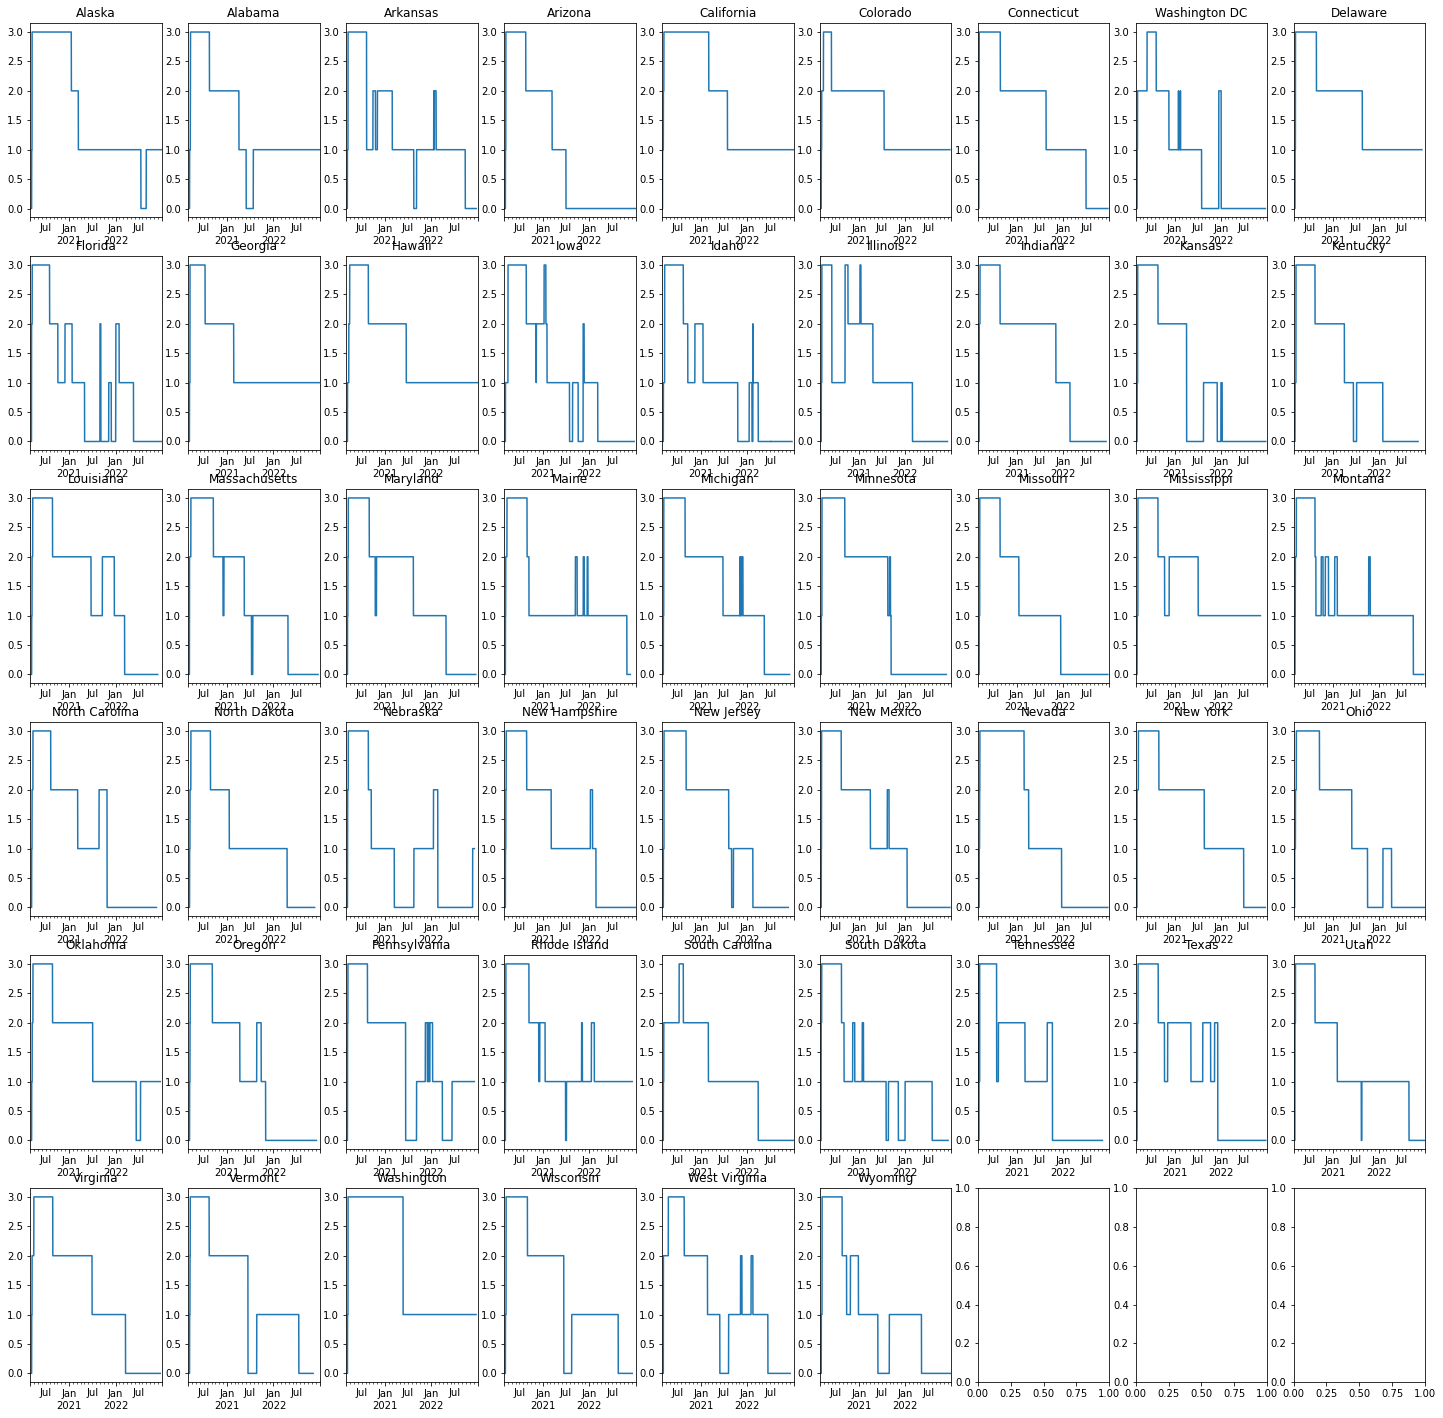

In [36]:
nrow=6
ncol=9
i=0
fig, axes = plt.subplots(nrow, ncol,figsize=(25,25))
for r in range(nrow):
  for c in range(ncol):
    df_policy1[df_policy1['RegionName']==states_p[i]]['C1M_School closing'].plot(ax=axes[r,c],title=states_p[i],xlabel='')
    if i ==len(states_p)-1:
      break
    i+=1

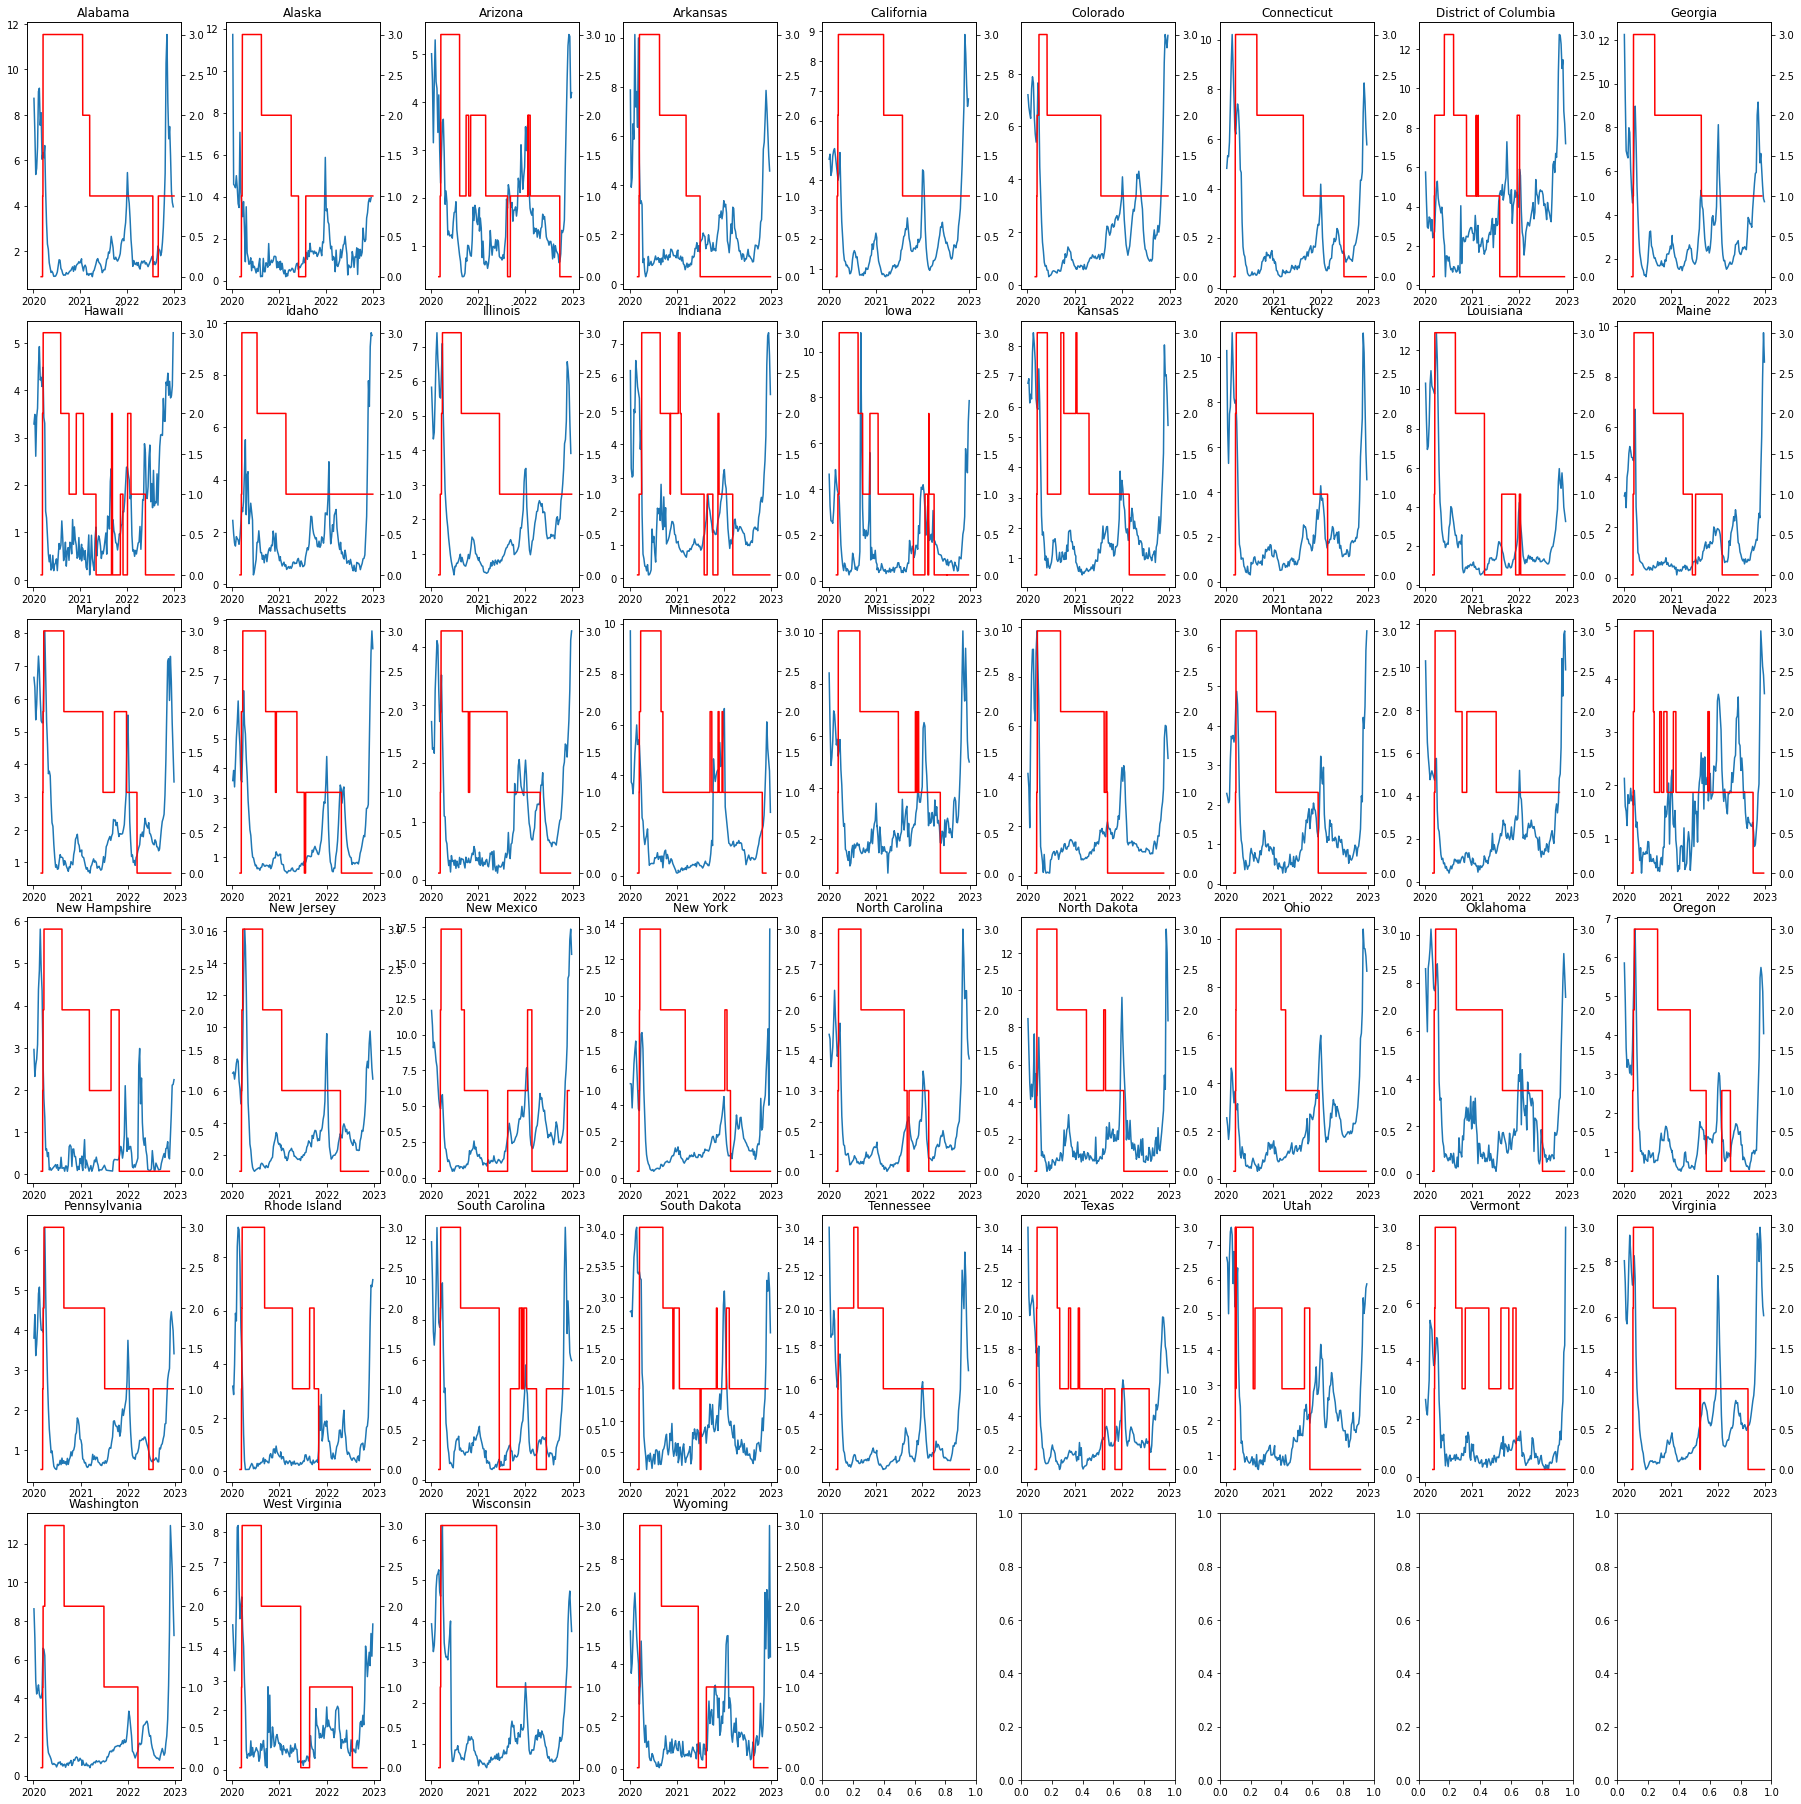

In [37]:
nrow=6
ncol=9
fig, axes = plt.subplots(nrow,ncol,figsize=(25,25))
fig.tight_layout()
i=0
for r in range(nrow):
  for c in range(ncol):
    if states[i] in us_state_to_abbrev:
      if us_state_to_abbrev[states[i]] in states_m:
        axes[r,c].plot(df4[df4['REGION']==states[i]]['%UNWEIGHTED ILI'],label=states[i])
        axes[r,c].set_title(states[i])
        ax2=axes[r,c].twinx()
        ax2.plot(df_policy1[df_policy1['RegionName']==states_p[i]]['C1M_School closing'],color='red')
        #axes[r,c].get_xaxis().set_visible(False)
        #axes[r,c].set_xticks(df4[df4['REGION']==states[0]]['%UNWEIGHTED ILI'].index.month)
        axes[r,c].xaxis.set_major_locator(matplotlib.dates.YearLocator())
        axes[r,c].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
        if i==len(states_m)-1:
          break
        i+=1



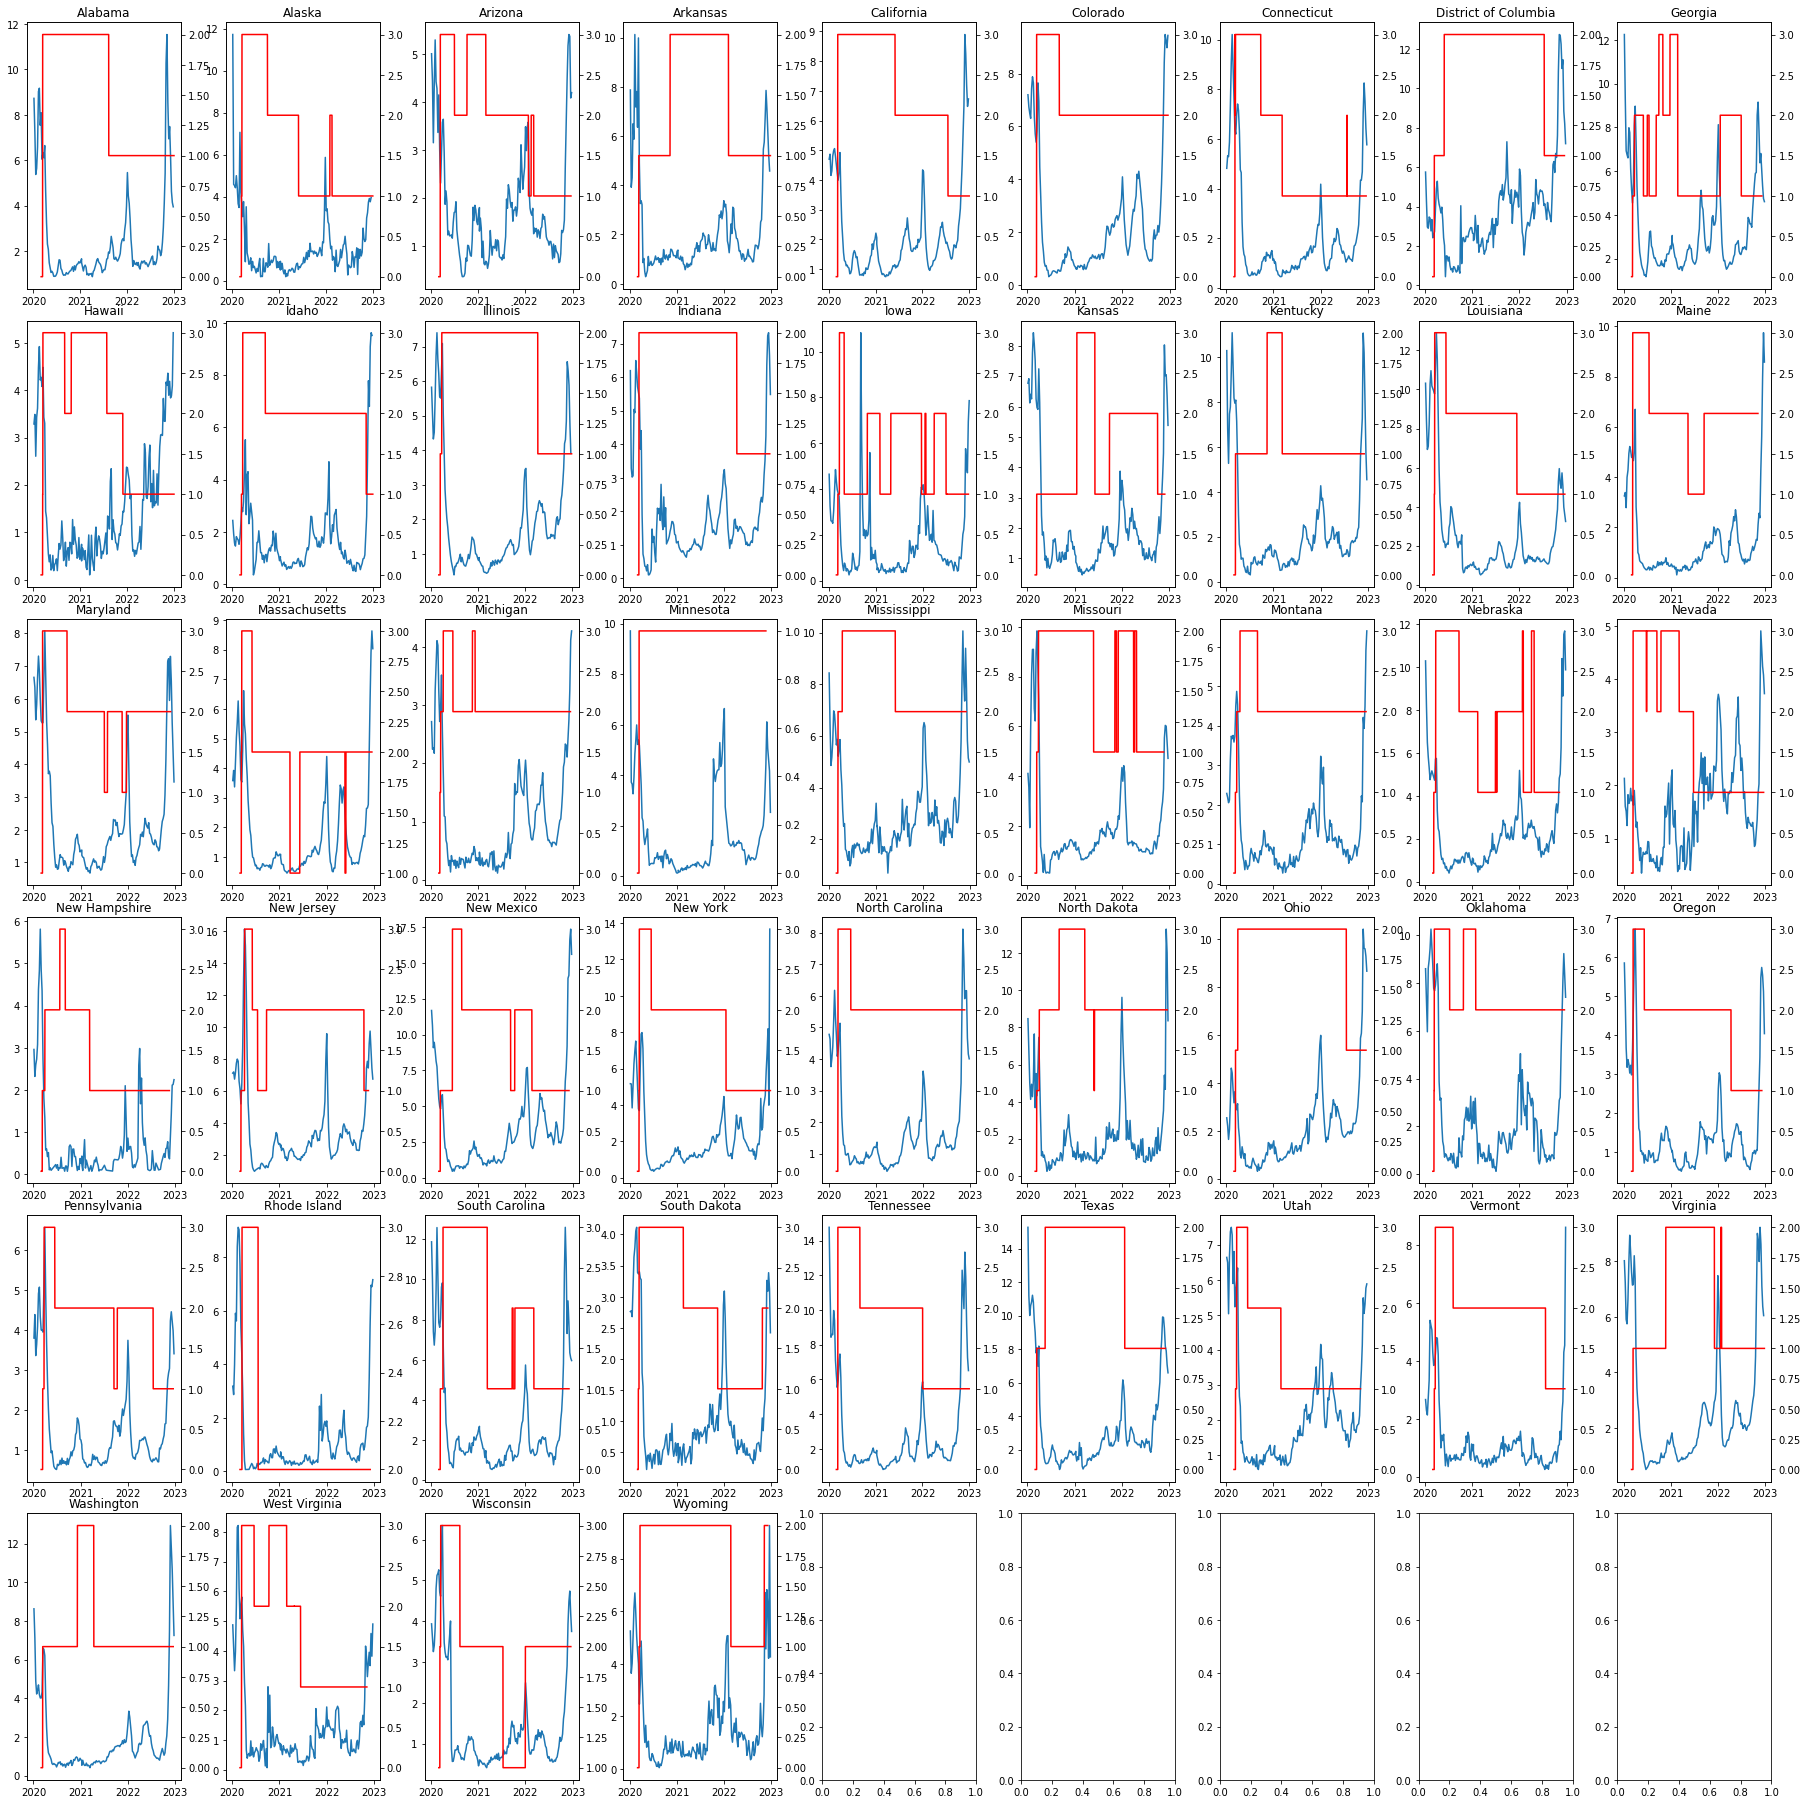

In [38]:
nrow=6
ncol=9
fig, axes = plt.subplots(nrow,ncol,figsize=(25,25))
fig.tight_layout()
i=0
for r in range(nrow):
  for c in range(ncol):
    if states[i] in us_state_to_abbrev:
      if us_state_to_abbrev[states[i]] in states_m:
        axes[r,c].plot(df4[df4['REGION']==states[i]]['%UNWEIGHTED ILI'],label=states[i])
        axes[r,c].set_title(states[i])
        ax2=axes[r,c].twinx()
        ax2.plot(df_policy1[df_policy1['RegionName']==states_p[i]]['H8M_Protection of elderly people'],color='red')
        #axes[r,c].get_xaxis().set_visible(False)
        #axes[r,c].set_xticks(df4[df4['REGION']==states[0]]['%UNWEIGHTED ILI'].index.month)
        axes[r,c].xaxis.set_major_locator(matplotlib.dates.YearLocator())
        axes[r,c].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
        if i==len(states_m)-1:
          break
        i+=1

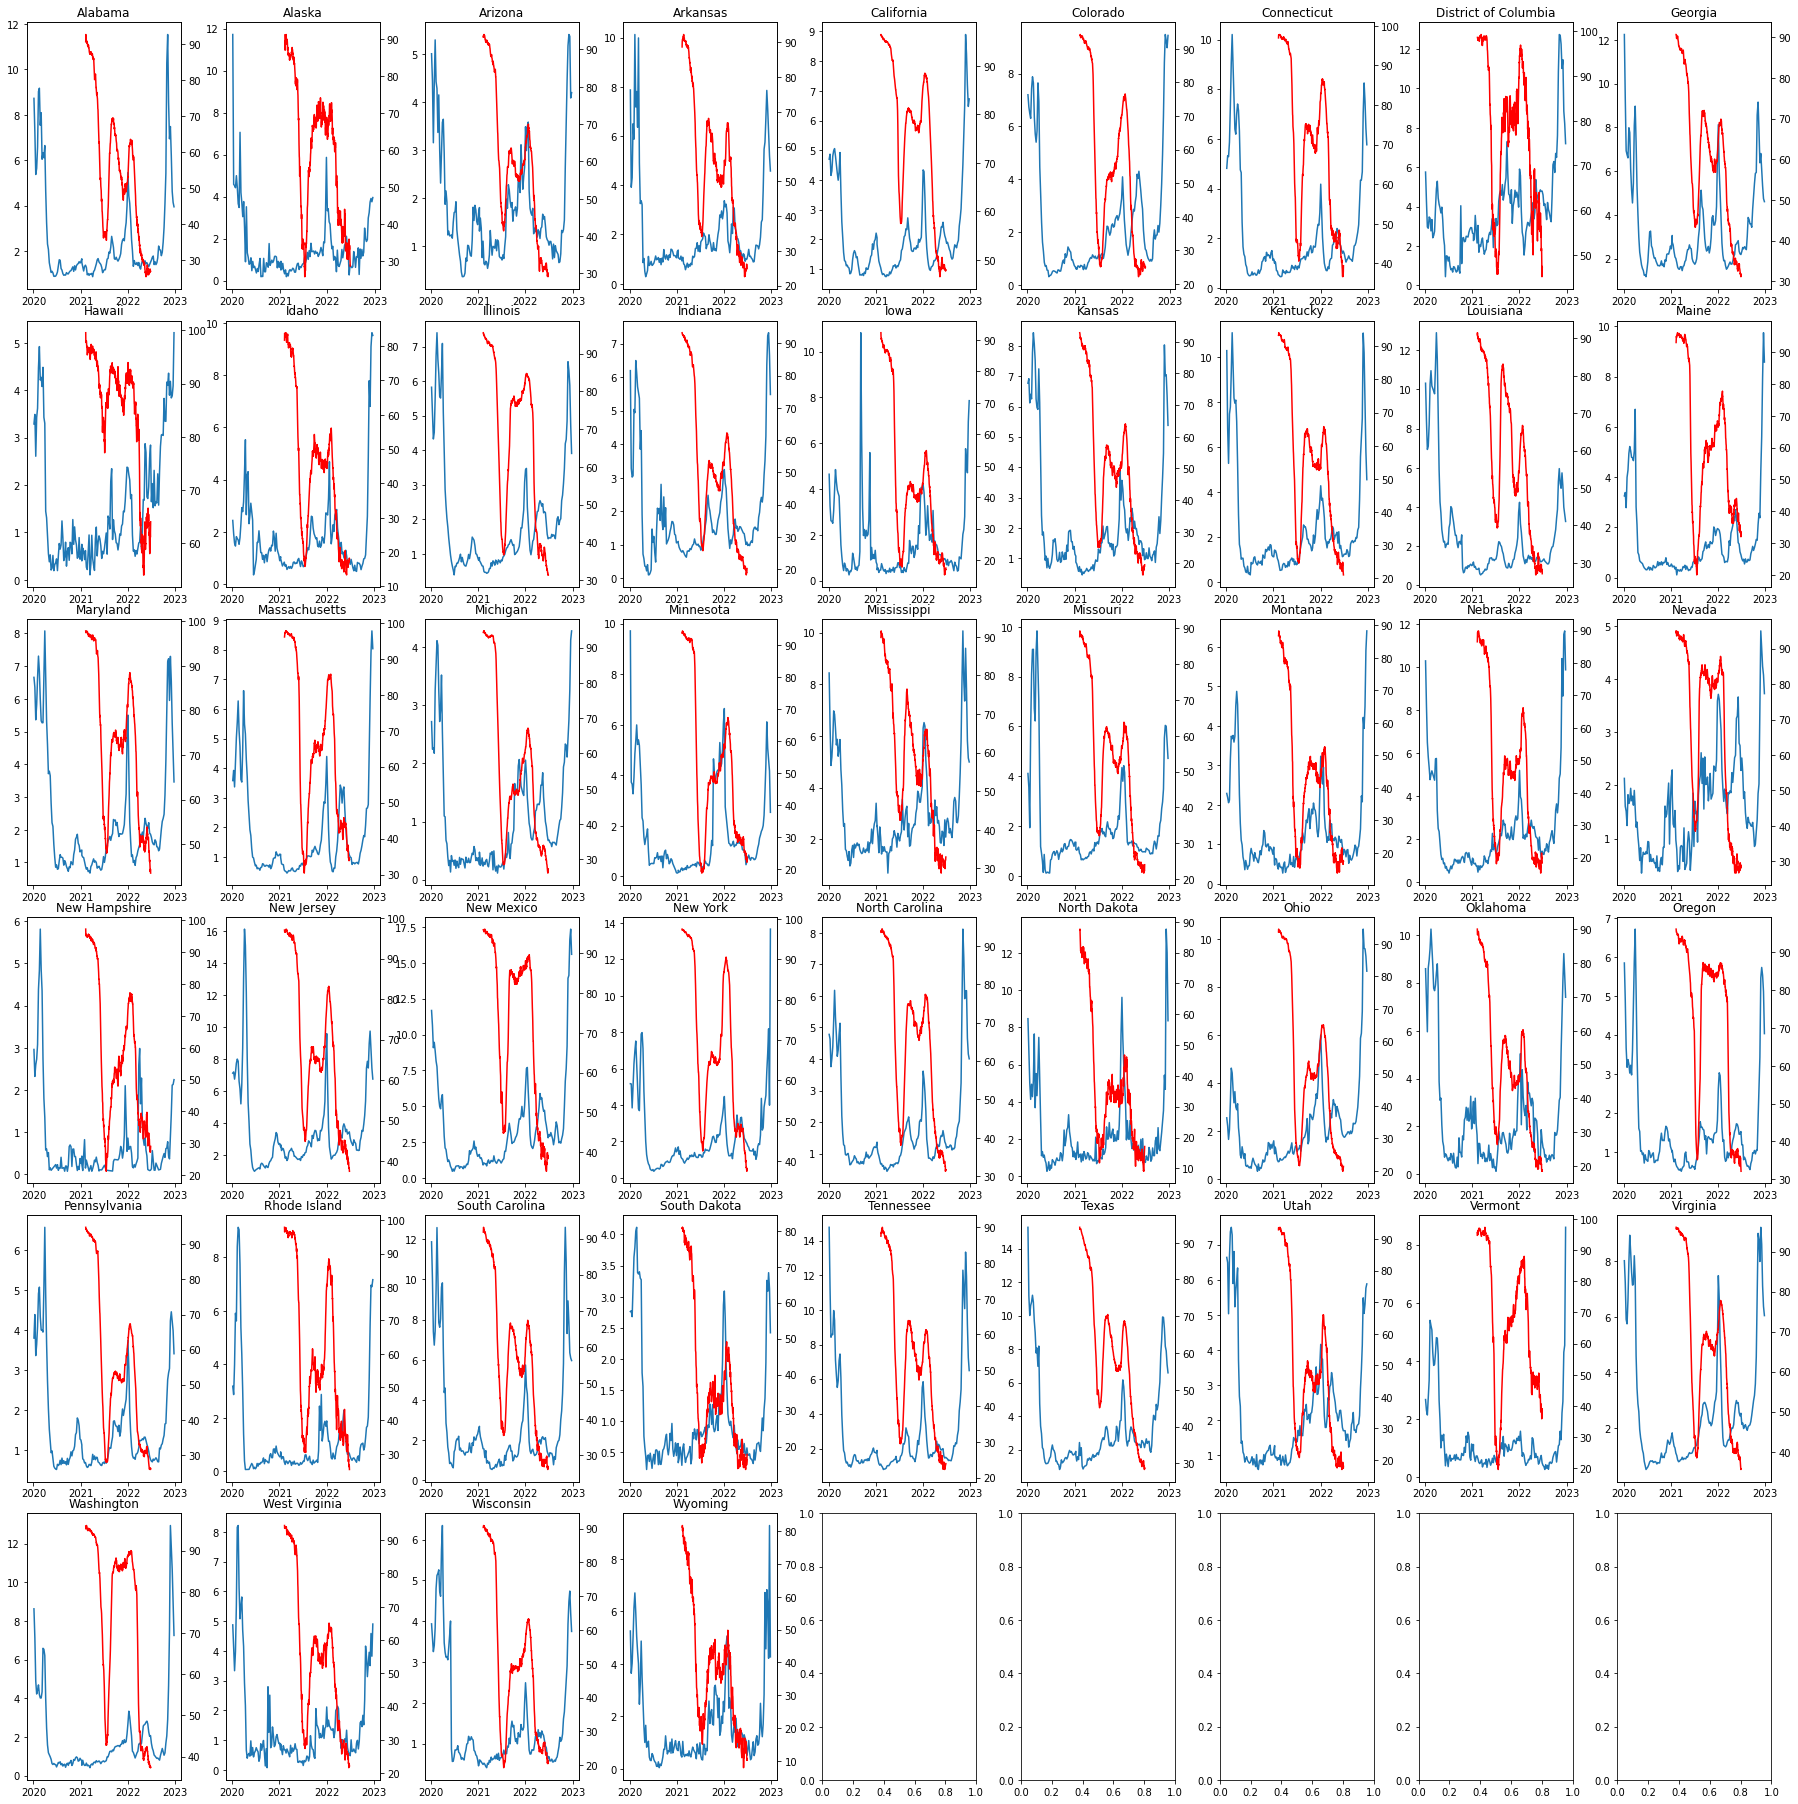

In [41]:
nrow=6
ncol=9
fig, axes = plt.subplots(nrow,ncol,figsize=(25,25))
fig.tight_layout()
i=0
for r in range(nrow):
  for c in range(ncol):
    if states[i] in us_state_to_abbrev:
      if us_state_to_abbrev[states[i]] in states_m:
        axes[r,c].plot(df4[df4['REGION']==states[i]]['%UNWEIGHTED ILI'],label=states[i])
        axes[r,c].set_title(states[i])
        ax2=axes[r,c].twinx()
        ax2.plot(df_masks1[df_masks1['state']==us_state_to_abbrev[states[i]]]['value'],color='red')
        #axes[r,c].get_xaxis().set_visible(False)
        #axes[r,c].set_xticks(df4[df4['REGION']==states[0]]['%UNWEIGHTED ILI'].index.month)
        axes[r,c].xaxis.set_major_locator(matplotlib.dates.YearLocator())
        axes[r,c].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
        if i==len(states_m)-1:
          break
        i+=1